#### Problem statement

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. 

Dataset sample consists of 28X28 greyscale images associated with a label from 10 classes.

0 => T shirt/top
1 => Trouser
2 => pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle Boot

#### Importing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df = pd.read_csv(r'fashion-mnist_train.csv', sep = ',')

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df = pd.read_csv(r'fashion-mnist_test.csv', sep = ',')
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Visualizing the data

In [6]:
fashion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
fashion_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

Comparing label with the defined classes
0 => T shirt/top
1 => Trouser
2 => pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle Boot

6.0

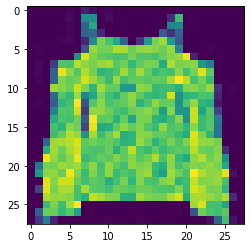

In [16]:
import random
i = random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28,28)) #skip 0th column which is label
label = training[i,0]
label

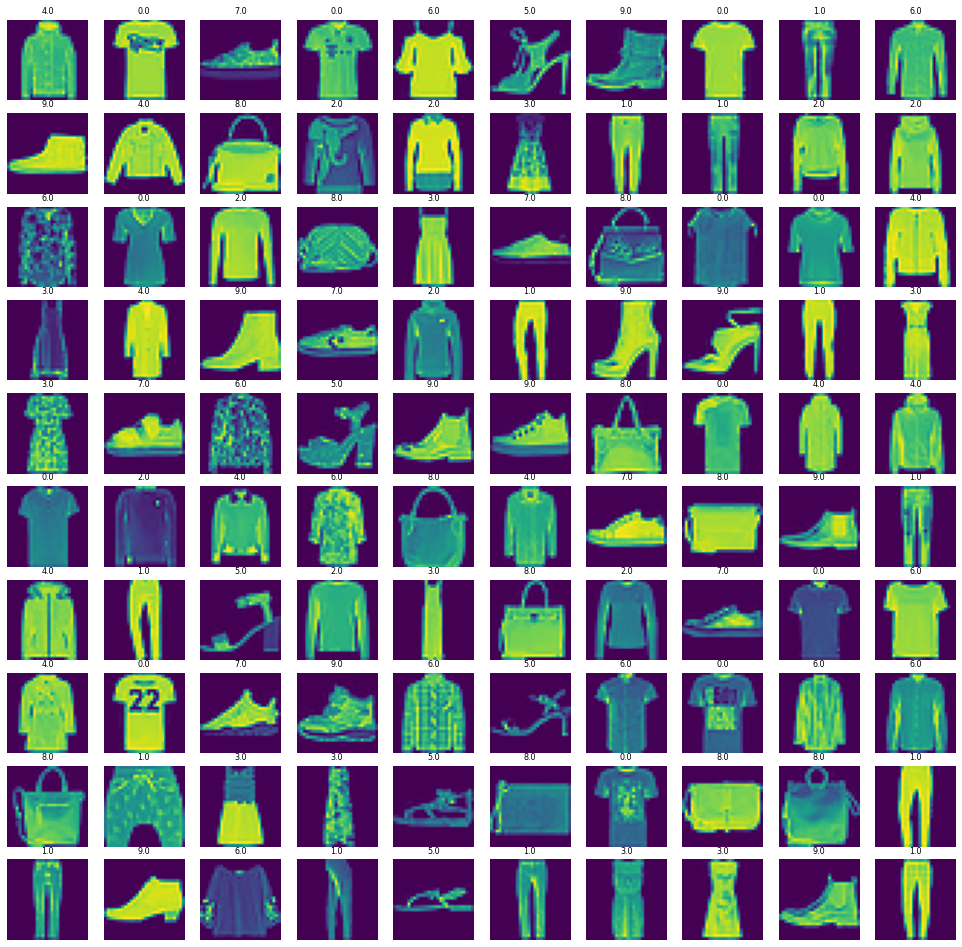

In [20]:
#Lets view data in a grid/matrix format
#Define the dimensions of the plot grid

W_grid = 10
L_grid = 10

#fig, axes = plt.subplots(L_grid, W_grid)
#subplot returns the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() #flatten the 15x15 matrix into 225 array

n_training = len(training) #get the length of the training dataset

#Select a random number from 0 to n_training
for i in np.arange(0 , W_grid * L_grid ): #create evenly spaces variables
    
    #select a random number
    index = np.random.randint(0, n_training)
    #read and display an image with the selected index
    axes[i].imshow(training[index, 1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.1)


#### Convolution Neural networks - Model Training

In [22]:
X_train = training[:, 1:]/255
y_train = training[:,0]

In [23]:
X_test = testing[:, 1:]/255
y_test = testing[:,0]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [26]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test =X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [27]:
X_train.shape

(48000, 28, 28, 1)

In [28]:
X_test.shape

(10000, 28, 28, 1)

In [29]:
X_validate.shape

(12000, 28, 28, 1)

In [30]:
import keras

Using TensorFlow backend.


In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [34]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28,28,1), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\sadiqgpasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


In [35]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [36]:
cnn_model.add(Flatten())

In [38]:
cnn_model.add(Dense(units = 32, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [39]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics=['accuracy'])

In [40]:
epochs = 50

In [41]:
cnn_model.fit(X_train, y_train, batch_size = 512, nb_epoch = epochs, verbose = 1, 
             validation_data = (X_validate, y_validate))

C:\Users\sadiqgpasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 14s 284us/step - loss: 2.0343 - accuracy: 0.3141 - val_loss: 1.7568 - val_accuracy: 0.4782
Epoch 2/50
48000/48000 [==============================] - 13s 276us/step - loss: 1.4114 - accuracy: 0.6471 - val_loss: 1.0477 - val_accuracy: 0.7425
Epoch 3/50
48000/48000 [==============================] - 13s 275us/step - loss: 0.8341 - accuracy: 0.7522 - val_loss: 0.6845 - val_accuracy: 0.7697
Epoch 4/50
48000/48000 [==============================] - 13s 265us/step - loss: 0.6221 - accuracy: 0.7835 - val_loss: 0.5670 - val_accuracy: 0.8036
Epoch 5/50
48000/48000 [==============================] - 14s 288us/step - loss: 0.5191 - accuracy: 0.8165 - val_loss: 0.4751 - val_accuracy: 0.8314
Epoch 6/50
48000/48000 [==============================] - 13s 267us/step - loss: 0.4460 - accuracy: 0.8456 - val_loss: 0.4197 - val_accuracy: 0.8626
Epoch 7/50
48000/48000 [==============================] 

#### Evaluating the model

In [42]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 106us/step
Test Accuracy : 0.911


In [43]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

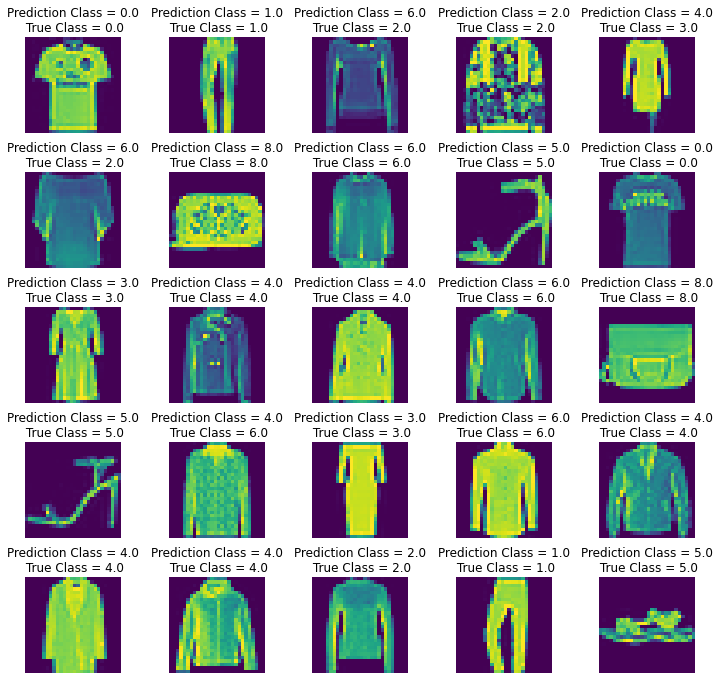

In [47]:
L = 5
W = 5
fig, axes = plt.subplots(L,W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

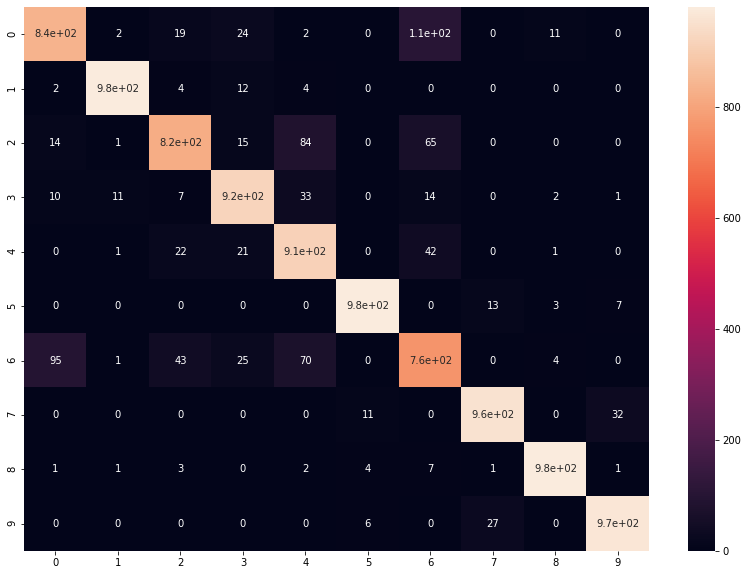

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [49]:
from sklearn.metrics import classification_report

num_classes = 10

target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.83      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.89      0.82      0.86      1000
     Class 3       0.90      0.92      0.91      1000
     Class 4       0.82      0.91      0.87      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.76      0.76      0.76      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



0 => T shirt/top
1 => Trouser
2 => pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle Boot

As per the results from classification reports it is clear that the accuracy of classification is 91%